In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from plotly import tools

In [3]:
import chart_studio.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [4]:
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqline

In [6]:
df = pd.read_csv("bank_raw.csv", sep=";")

In [7]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [35]:
df.to_csv("Bank1.csv", index=False)

In [38]:
df = pd.read_csv("Bank1.csv", parse_dates=[['day','month','year']])

In [39]:
df

,day_month_year,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,2008-05-05,58,management,married,tertiary,no,2143,yes,no,unknown,261,1,-1,0,unknown,no
1,2008-05-05,44,technician,single,secondary,no,29,yes,no,unknown,151,1,-1,0,unknown,no
2,2008-05-05,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,76,1,-1,0,unknown,no
3,2008-05-05,47,blue-collar,married,unknown,no,1506,yes,no,unknown,92,1,-1,0,unknown,no
4,2008-05-05,33,unknown,single,unknown,no,1,no,no,unknown,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,2010-11-17,51,technician,married,tertiary,no,825,no,no,cellular,977,3,-1,0,unknown,yes
45207,2010-11-17,71,retired,divorced,primary,no,1729,no,no,cellular,456,2,-1,0,unknown,yes
45208,2010-11-17,72,retired,married,secondary,no,5715,no,no,cellular,1127,5,184,3,success,yes
45209,2010-11-17,57,blue-collar,married,secondary,no,668,no,no,telephone,508,4,-1,0,unknown,no


In [41]:
df.rename(columns={'day_month_year':'date'}, inplace=True)

In [42]:
df

,date,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,2008-05-05,58,management,married,tertiary,no,2143,yes,no,unknown,261,1,-1,0,unknown,no
1,2008-05-05,44,technician,single,secondary,no,29,yes,no,unknown,151,1,-1,0,unknown,no
2,2008-05-05,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,76,1,-1,0,unknown,no
3,2008-05-05,47,blue-collar,married,unknown,no,1506,yes,no,unknown,92,1,-1,0,unknown,no
4,2008-05-05,33,unknown,single,unknown,no,1,no,no,unknown,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,2010-11-17,51,technician,married,tertiary,no,825,no,no,cellular,977,3,-1,0,unknown,yes
45207,2010-11-17,71,retired,divorced,primary,no,1729,no,no,cellular,456,2,-1,0,unknown,yes
45208,2010-11-17,72,retired,married,secondary,no,5715,no,no,cellular,1127,5,184,3,success,yes
45209,2010-11-17,57,blue-collar,married,secondary,no,668,no,no,telephone,508,4,-1,0,unknown,no


In [115]:
df=pd.read_csv("Bank2.csv", parse_dates=['date'])

In [95]:
df

,date,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,2008-05-05,58,management,married,tertiary,no,2143,yes,no,unknown,261,1,-1,0,unknown,no
1,2008-05-05,44,technician,single,secondary,no,29,yes,no,unknown,151,1,-1,0,unknown,no
2,2008-05-05,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,76,1,-1,0,unknown,no
3,2008-05-05,47,blue-collar,married,unknown,no,1506,yes,no,unknown,92,1,-1,0,unknown,no
4,2008-05-05,33,unknown,single,unknown,no,1,no,no,unknown,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,2010-11-17,51,technician,married,tertiary,no,825,no,no,cellular,977,3,-1,0,unknown,yes
45207,2010-11-17,71,retired,divorced,primary,no,1729,no,no,cellular,456,2,-1,0,unknown,yes
45208,2010-11-17,72,retired,married,secondary,no,5715,no,no,cellular,1127,5,184,3,success,yes
45209,2010-11-17,57,blue-collar,married,secondary,no,668,no,no,telephone,508,4,-1,0,unknown,no


In [96]:
df.columns

Index(['date', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       45211 non-null  datetime64[ns]
 1   age        45211 non-null  int64         
 2   job        45211 non-null  object        
 3   marital    45211 non-null  object        
 4   education  45211 non-null  object        
 5   default    45211 non-null  object        
 6   balance    45211 non-null  int64         
 7   housing    45211 non-null  object        
 8   loan       45211 non-null  object        
 9   contact    45211 non-null  object        
 10  duration   45211 non-null  int64         
 11  campaign   45211 non-null  int64         
 12  pdays      45211 non-null  int64         
 13  previous   45211 non-null  int64         
 14  poutcome   45211 non-null  object        
 15  y          45211 non-null  object        
dtypes: datetime64[ns](1), int64(6), object(9

In [98]:
df.describe()

,age,balance,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,4918.000000,63.000000,871.000000,275.000000


In [5]:
df['poutcome'].value_counts()

NameError: name 'df' is not defined

In [ ]:
df[]

In [99]:
df.balance.quantile(np.arange(0.0,1.1,0.1))

0.0     -8019.0
0.1         0.0
0.2        22.0
0.3       131.0
0.4       272.0
0.5       448.0
0.6       701.0
0.7      1126.0
0.8      1859.0
0.9      3574.0
1.0    102127.0
Name: balance, dtype: float64

Text(0.5, 1.0, 'QQ Plot of Balance')

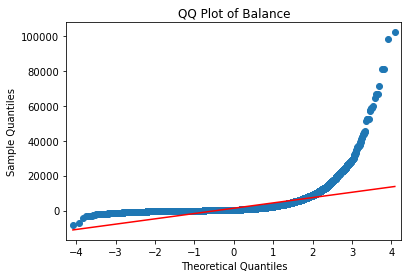

In [100]:
sm.qqplot(df[['balance']].sort_values(['balance']), line='s')
plt.title("QQ Plot of Balance")

Text(0.5, 1.0, 'QQ Plot of NEGATIVE Balance')

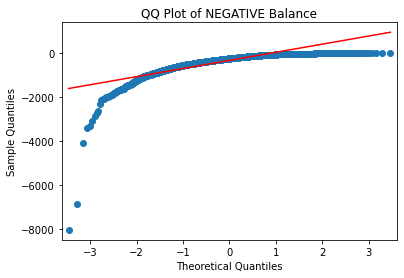

In [101]:
sm.qqplot(df['balance'].loc[df['balance']<0].sort_values(), line='s')
plt.title("QQ Plot of NEGATIVE Balance")

In [102]:
df['balance'].loc[df['balance']<0].sort_values().count()

3766

In [103]:
df['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [104]:
df['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [105]:
df['housing'].value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

In [106]:
df['loan'].value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

In [107]:
df['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

Text(0.5, 1.0, 'QQ Plot of NEGATIVE Balance')

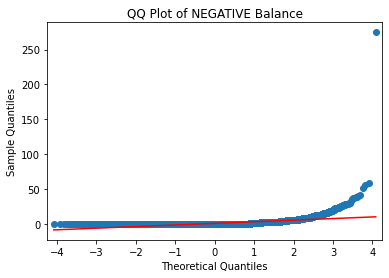

In [63]:
sm.qqplot(df[['previous']].sort_values(['previous']), line='s')
plt.title("QQ Plot of NEGATIVE Balance")

In [118]:
df=df.drop(df.loc[df['previous']==275].index)

In [122]:
df['previous'].sort_valueslues()

0         0
24803     0
24805     0
24806     0
24807     0
         ..
42611    40
44822    41
28886    51
44089    55
38326    58
Name: previous, Length: 45210, dtype: int64

In [124]:
df.shape

(45210, 16)

Text(0.5, 1.0, 'QQ Plot of NEGATIVE Balance')

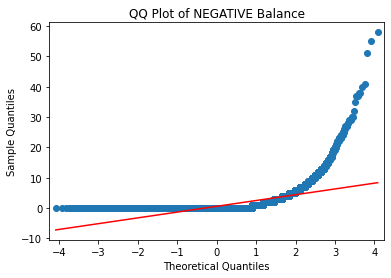

In [123]:
sm.qqplot(df[['previous']].sort_values(['previous']), line='s')
plt.title("QQ Plot of NEGATIVE Balance")

In [5]:
df = pd.read_csv("Bank3.csv", parse_dates=['date'])

In [6]:
df

,date,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,deposit
0,2008-05-05,58,management,married,tertiary,no,2143,yes,no,unknown,261,1,-1,0,unknown,no
1,2008-05-05,44,technician,single,secondary,no,29,yes,no,unknown,151,1,-1,0,unknown,no
2,2008-05-05,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,76,1,-1,0,unknown,no
3,2008-05-05,47,blue-collar,married,unknown,no,1506,yes,no,unknown,92,1,-1,0,unknown,no
4,2008-05-05,33,unknown,single,unknown,no,1,no,no,unknown,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45205,2010-11-17,51,technician,married,tertiary,no,825,no,no,cellular,977,3,-1,0,unknown,yes
45206,2010-11-17,71,retired,divorced,primary,no,1729,no,no,cellular,456,2,-1,0,unknown,yes
45207,2010-11-17,72,retired,married,secondary,no,5715,no,no,cellular,1127,5,184,3,success,yes
45208,2010-11-17,57,blue-collar,married,secondary,no,668,no,no,telephone,508,4,-1,0,unknown,no


In [7]:
# Admin and management are basically the same hence we put it under the same categorical value
df['job'].loc[df['job']=='admin.'] = 'management'

In [8]:
# Replacing the unknown job title to the highest mode job: management
df['job'].loc[df['job']=='unknown'] = 'management'

In [9]:
df

,date,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,deposit
0,2008-05-05,58,management,married,tertiary,no,2143,yes,no,unknown,261,1,-1,0,unknown,no
1,2008-05-05,44,technician,single,secondary,no,29,yes,no,unknown,151,1,-1,0,unknown,no
2,2008-05-05,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,76,1,-1,0,unknown,no
3,2008-05-05,47,blue-collar,married,unknown,no,1506,yes,no,unknown,92,1,-1,0,unknown,no
4,2008-05-05,33,management,single,unknown,no,1,no,no,unknown,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45205,2010-11-17,51,technician,married,tertiary,no,825,no,no,cellular,977,3,-1,0,unknown,yes
45206,2010-11-17,71,retired,divorced,primary,no,1729,no,no,cellular,456,2,-1,0,unknown,yes
45207,2010-11-17,72,retired,married,secondary,no,5715,no,no,cellular,1127,5,184,3,success,yes
45208,2010-11-17,57,blue-collar,married,secondary,no,668,no,no,telephone,508,4,-1,0,unknown,no


In [10]:
import squarify

In [138]:
# Now let's see which occupation tended to have more balance in their accounts

suscribed_df = df.loc[df["deposit"] == "yes"]

occupations = df["job"].unique().tolist()

# Get the balances by jobs
management = suscribed_df["age"].loc[suscribed_df["job"] == "management"].values
technician = suscribed_df["age"].loc[suscribed_df["job"] == "technician"].values
services = suscribed_df["age"].loc[suscribed_df["job"] == "services"].values
retired = suscribed_df["age"].loc[suscribed_df["job"] == "retired"].values
blue_collar = suscribed_df["age"].loc[suscribed_df["job"] == "blue-collar"].values
unemployed = suscribed_df["age"].loc[suscribed_df["job"] == "unemployed"].values
entrepreneur = suscribed_df["age"].loc[suscribed_df["job"] == "entrepreneur"].values
housemaid = suscribed_df["age"].loc[suscribed_df["job"] == "housemaid"].values
self_employed = suscribed_df["age"].loc[suscribed_df["job"] == "self-employed"].values
student = suscribed_df["age"].loc[suscribed_df["job"] == "student"].values


ages = [management, technician, services, retired, blue_collar, unemployed, 
         entrepreneur, housemaid, self_employed, student]

colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)',
          'rgba(44, 160, 101, 0.5)', 'rgba(255, 65, 54, 0.5)', 
          'rgba(207, 114, 255, 0.5)', 'rgba(127, 96, 0, 0.5)',
         'rgba(229, 126, 56, 0.5)', 'rgba(229, 56, 56, 0.5)',
         'rgba(174, 229, 56, 0.5)', 'rgba(229, 56, 56, 0.5)']

traces = []

for xd, yd, cls in zip(occupations, ages, colors):
        traces.append(go.Box(
            y=yd,
            name=xd,
            boxpoints='all',
            jitter=0.5,
            whiskerwidth=0.2,
            fillcolor=cls,
            marker=dict(
                size=2,
            ),
            line=dict(width=1),
        ))

layout = go.Layout(
    title='Distribution of Ages by Occupation',
    yaxis=dict(
        autorange=True,
        showgrid=True,
        zeroline=True,
        dtick=5,
        gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
    ),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    paper_bgcolor='rgb(224,255,246)',
    plot_bgcolor='rgb(251,251,251)',
    showlegend=False
)

fig = go.Figure(data=traces, layout=layout)
iplot(fig)

In [89]:
#Understanding the balance
df["balance_status"] = np.nan

In [12]:
df.balance.describe()

count     45210.000000
mean       1362.290179
std        3044.797065
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

In [13]:
df.balance.quantile(np.arange(0.0,1.1,0.1))

0.0     -8019.0
0.1         0.0
0.2        22.0
0.3       131.0
0.4       272.0
0.5       448.0
0.6       701.0
0.7      1126.0
0.8      1859.2
0.9      3574.1
1.0    102127.0
Name: balance, dtype: float64

Text(0.5, 1.0, 'QQ Plot of Balance')

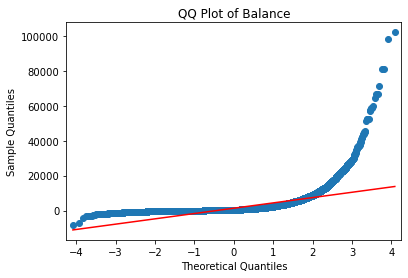

In [14]:
sm.qqplot(df[['balance']].sort_values(['balance']), line='s', )
plt.title("QQ Plot of Balance")

#### Assigning balance status as per the quantiles

In [99]:
df["balance_status"].loc[(df['balance']>=df.balance.quantile(0.0)) & 
                         (df['balance']<=df.balance.quantile(0.2))] = 'very low'

df["balance_status"].loc[(df['balance']>df.balance.quantile(0.2)) & 
                         (df['balance']<=df.balance.quantile(0.4))] = 'low'

df["balance_status"].loc[(df['balance']>df.balance.quantile(0.4)) & 
                         (df['balance']<=df.balance.quantile(0.6))] = 'medium'

df["balance_status"].loc[(df['balance']>df.balance.quantile(0.6)) & 
                         (df['balance']<=df.balance.quantile(0.8))] = 'high'

df["balance_status"].loc[(df['balance']>df.balance.quantile(0.8)) & 
                         (df['balance']<=df.balance.quantile(1.0))] = 'very high'

In [100]:
df

,date,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,deposit,balance_status
0,2008-05-05,58,management,married,tertiary,no,2143,yes,no,unknown,261,1,-1,0,unknown,no,very high
1,2008-05-05,44,technician,single,secondary,no,29,yes,no,unknown,151,1,-1,0,unknown,no,low
2,2008-05-05,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,76,1,-1,0,unknown,no,very low
3,2008-05-05,47,blue-collar,married,unknown,no,1506,yes,no,unknown,92,1,-1,0,unknown,no,high
4,2008-05-05,33,management,single,unknown,no,1,no,no,unknown,198,1,-1,0,unknown,no,very low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45205,2010-11-17,51,technician,married,tertiary,no,825,no,no,cellular,977,3,-1,0,unknown,yes,high
45206,2010-11-17,71,retired,divorced,primary,no,1729,no,no,cellular,456,2,-1,0,unknown,yes,high
45207,2010-11-17,72,retired,married,secondary,no,5715,no,no,cellular,1127,5,184,3,success,yes,very high
45208,2010-11-17,57,blue-collar,married,secondary,no,668,no,no,telephone,508,4,-1,0,unknown,no,medium


In [101]:
df.balance_status.value_counts()

low          9060
very low     9053
very high    9042
high         9039
medium       9016
Name: balance_status, dtype: int64

In [17]:
count_balance_response_pct = pd.crosstab(df['deposit'],df['balance_status']).apply(lambda x: x/x.sum() * 100)
count_balance_response_pct = count_balance_response_pct.transpose()

In [102]:
df.to_csv("Bank4.csv",index=False)

In [6]:
df=pd.read_csv("Bank4.csv")

In [7]:
df

,date,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,deposit,balance_status
0,2008-05-05,58,management,married,tertiary,no,2143,yes,no,unknown,261,1,-1,0,unknown,no,very high
1,2008-05-05,44,technician,single,secondary,no,29,yes,no,unknown,151,1,-1,0,unknown,no,low
2,2008-05-05,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,76,1,-1,0,unknown,no,very low
3,2008-05-05,47,blue-collar,married,unknown,no,1506,yes,no,unknown,92,1,-1,0,unknown,no,high
4,2008-05-05,33,management,single,unknown,no,1,no,no,unknown,198,1,-1,0,unknown,no,very low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45205,2010-11-17,51,technician,married,tertiary,no,825,no,no,cellular,977,3,-1,0,unknown,yes,high
45206,2010-11-17,71,retired,divorced,primary,no,1729,no,no,cellular,456,2,-1,0,unknown,yes,high
45207,2010-11-17,72,retired,married,secondary,no,5715,no,no,cellular,1127,5,184,3,success,yes,very high
45208,2010-11-17,57,blue-collar,married,secondary,no,668,no,no,telephone,508,4,-1,0,unknown,no,medium


In [8]:
from scipy.stats import zscore

In [9]:
df1 = df

In [10]:
df1

,date,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,deposit,balance_status
0,2008-05-05,58,management,married,tertiary,no,2143,yes,no,unknown,261,1,-1,0,unknown,no,very high
1,2008-05-05,44,technician,single,secondary,no,29,yes,no,unknown,151,1,-1,0,unknown,no,low
2,2008-05-05,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,76,1,-1,0,unknown,no,very low
3,2008-05-05,47,blue-collar,married,unknown,no,1506,yes,no,unknown,92,1,-1,0,unknown,no,high
4,2008-05-05,33,management,single,unknown,no,1,no,no,unknown,198,1,-1,0,unknown,no,very low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45205,2010-11-17,51,technician,married,tertiary,no,825,no,no,cellular,977,3,-1,0,unknown,yes,high
45206,2010-11-17,71,retired,divorced,primary,no,1729,no,no,cellular,456,2,-1,0,unknown,yes,high
45207,2010-11-17,72,retired,married,secondary,no,5715,no,no,cellular,1127,5,184,3,success,yes,very high
45208,2010-11-17,57,blue-collar,married,secondary,no,668,no,no,telephone,508,4,-1,0,unknown,no,medium


In [11]:
df1['balance_outliers'] = df1['balance']

In [12]:
df1['balance_outliers']= zscore(df1['balance_outliers'])

In [15]:
df1['deposit'].value_counts()

no     39921
yes     5289
Name: deposit, dtype: int64

In [19]:
condition1 = (df1['balance_outliers']>3) | (df1['balance_outliers']<-3 )
dataset3 = df1.drop(df1[condition1].index, axis = 0, inplace = False)

In [23]:
df7=df1[condition1]

In [24]:
df7['balance_status'].value_counts()

very high    744
very low       1
Name: balance_status, dtype: int64

In [27]:
df7[df7['balance_status']=='very high'].describe()

,age,balance,duration,campaign,pdays,previous,balance_outliers
count,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000
mean,44.173387,17973.583333,264.408602,2.663978,37.456989,0.627688,5.455693
std,11.437503,10285.362938,263.009428,2.950921,91.499992,1.861948,3.378050
min,22.000000,10500.000000,1.000000,1.000000,-1.000000,0.000000,3.001123
25%,34.000000,12102.250000,106.000000,1.000000,-1.000000,0.000000,3.527354
50%,43.000000,14375.000000,182.000000,2.000000,-1.000000,0.000000,4.273800
75%,53.000000,20451.500000,318.000000,3.000000,-1.000000,0.000000,6.269522
max,85.000000,102127.000000,2187.000000,31.000000,589.000000,23.000000,33.094430


In [20]:
dataset3

,date,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,deposit,balance_status,balance_outliers
0,2008-05-05,58,management,married,tertiary,no,2143,yes,no,unknown,261,1,-1,0,unknown,no,very high,0.256411
1,2008-05-05,44,technician,single,secondary,no,29,yes,no,unknown,151,1,-1,0,unknown,no,low,-0.437896
2,2008-05-05,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,76,1,-1,0,unknown,no,very low,-0.446764
3,2008-05-05,47,blue-collar,married,unknown,no,1506,yes,no,unknown,92,1,-1,0,unknown,no,high,0.047199
4,2008-05-05,33,management,single,unknown,no,1,no,no,unknown,198,1,-1,0,unknown,no,very low,-0.447092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45205,2010-11-17,51,technician,married,tertiary,no,825,no,no,cellular,977,3,-1,0,unknown,yes,high,-0.176464
45206,2010-11-17,71,retired,divorced,primary,no,1729,no,no,cellular,456,2,-1,0,unknown,yes,high,0.120440
45207,2010-11-17,72,retired,married,secondary,no,5715,no,no,cellular,1127,5,184,3,success,yes,very high,1.429572
45208,2010-11-17,57,blue-collar,married,secondary,no,668,no,no,telephone,508,4,-1,0,unknown,no,medium,-0.228028


In [28]:
dataset3["balance_status"].loc[(dataset3['balance']>=dataset3.balance.quantile(0.0)) & 
                         (dataset3['balance']<=dataset3.balance.quantile(0.2))] = 'very low'

dataset3["balance_status"].loc[(dataset3['balance']>dataset3.balance.quantile(0.2)) & 
                         (dataset3['balance']<=dataset3.balance.quantile(0.4))] = 'low'

dataset3["balance_status"].loc[(dataset3['balance']>dataset3.balance.quantile(0.4)) & 
                         (dataset3['balance']<=dataset3.balance.quantile(0.6))] = 'medium'

dataset3["balance_status"].loc[(dataset3['balance']>dataset3.balance.quantile(0.6)) & 
                         (dataset3['balance']<=dataset3.balance.quantile(0.8))] = 'high'

dataset3["balance_status"].loc[(dataset3['balance']>dataset3.balance.quantile(0.8)) & 
                         (dataset3['balance']<=dataset3.balance.quantile(1.0))] = 'very high'

In [29]:
count_balance_response_pct = pd.crosstab(dataset3['deposit'],dataset3['balance_status']).apply(lambda x: x/x.sum() * 100)
count_balance_response_pct = count_balance_response_pct.transpose()

In [31]:
count_balance_response_pct

deposit,no,yes
balance_status,,
high,86.812198,13.187802
low,90.154680,9.845320
medium,88.304818,11.695182
very high,83.580747,16.419253
very low,93.012856,6.987144


In [32]:
dataset3.balance.quantile(np.arange(0.0,1.1,0.1))

0.0    -6847.0
0.1        0.0
0.2       20.0
0.3      124.0
0.4      261.0
0.5      431.0
0.6      673.0
0.7     1065.0
0.8     1737.0
0.9     3205.2
1.0    10483.0
Name: balance, dtype: float64

In [35]:
dataset3.balance.quantile([0.25,0.50,0.75])

0.25      68.0
0.50     431.0
0.75    1347.0
Name: balance, dtype: float64

In [18]:
count_balance_response_pct

deposit,no,yes
balance_status,,
high,86.536121,13.463879
low,90.000000,10.000000
medium,88.287489,11.712511
very high,83.631940,16.368060
very low,93.040981,6.959019


In [57]:
# Calculate z-scores for each value
z_scores = (df['previous'] - df['previous'].mean()) / df['previous'].std()

In [58]:
z_scores

0       -0.300983
1       -0.300983
2       -0.300983
3       -0.300983
4       -0.300983
           ...   
45205   -0.300983
45206   -0.300983
45207    1.271404
45208   -0.300983
45209    5.464435
Name: previous, Length: 45210, dtype: float64

In [59]:
df4 = z_scores > 3

In [60]:
df3=df[df4]

In [43]:
df['deposit'].value_counts()

no     39921
yes     5289
Name: deposit, dtype: int64

In [61]:
df3['deposit'].value_counts()

no     589
yes    197
Name: deposit, dtype: int64

In [51]:
27/813

0.033210332103321034

In [31]:
df3.describe()

,age,balance,duration,campaign,pdays,previous
count,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000
mean,44.173387,17973.583333,264.408602,2.663978,37.456989,0.627688
std,11.437503,10285.362938,263.009428,2.950921,91.499992,1.861948
min,22.000000,10500.000000,1.000000,1.000000,-1.000000,0.000000
25%,34.000000,12102.250000,106.000000,1.000000,-1.000000,0.000000
50%,43.000000,14375.000000,182.000000,2.000000,-1.000000,0.000000
75%,53.000000,20451.500000,318.000000,3.000000,-1.000000,0.000000
max,85.000000,102127.000000,2187.000000,31.000000,589.000000,23.000000


In [13]:
num_vars = ['age','balance','duration','campaign','pdays', 'previous']

In [18]:
df.columns

Index(['date', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit', 'balance_status'],
      dtype='object')

In [19]:
cat_vars = ['job', 'marital', 'education', 'default', 'housing', 
            'loan', 'contact', 'poutcome', 'deposit', 'balance_status']

In [36]:
job_balance = df.groupby(['job', 'balance_status'])['balance'].mean()

In [37]:
job_balance

job            balance_status
blue-collar    high              1171.113904
               low                138.870952
               medium             463.944391
               very high         4517.570202
               very low          -146.017192
entrepreneur   high              1166.768116
               low                132.761006
               medium             447.602230
               very high         6220.702055
               very low          -116.475904
housemaid      high              1163.533333
               low                133.043165
               medium             455.080952
               very high         5165.513619
               very low           -50.070588
management     high              1174.089494
               low                137.031160
               medium             465.145841
               very high         5502.630474
               very low          -128.130948
retired        high              1210.474206
               low       

### Understanding the spread of data in some columns

In [25]:
df.describe()

,age,balance,duration,campaign,pdays,previous
count,45210.000000,45210.000000,45210.000000,45210.000000,45210.000000,45210.000000
mean,40.936231,1362.290179,258.161071,2.763858,40.192922,0.574253
std,10.618879,3044.797065,257.530306,3.098053,100.124419,1.907928
min,18.000000,-8019.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,4918.000000,63.000000,871.000000,58.000000


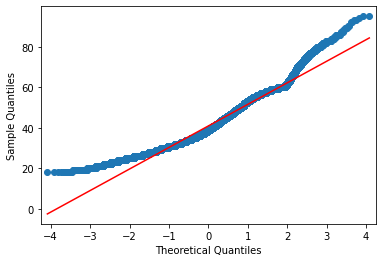

In [27]:
sm.qqplot(df[['age']].sort_values(['age']), line='s', )
plt.show()

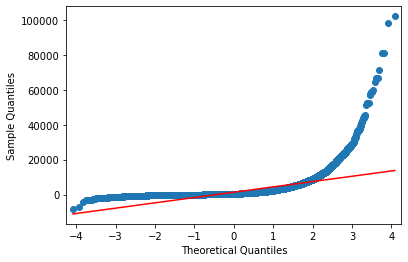

In [28]:
sm.qqplot(df[['balance']].sort_values(['balance']), line='s', )
plt.show()

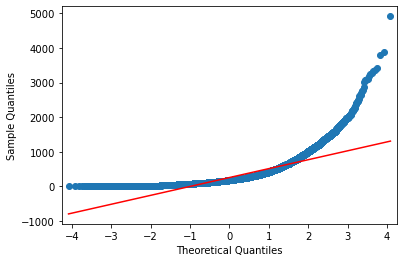

In [29]:
sm.qqplot(df[['duration']].sort_values(['duration']), line='s', )
plt.show()

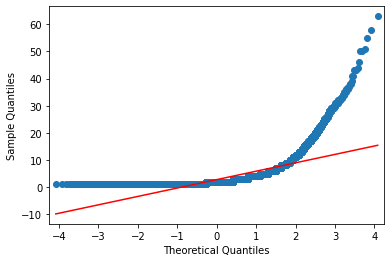

In [30]:
sm.qqplot(df[['campaign']].sort_values(['campaign']), line='s', )
plt.show()

C:\Users\KARAN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='campaign'>

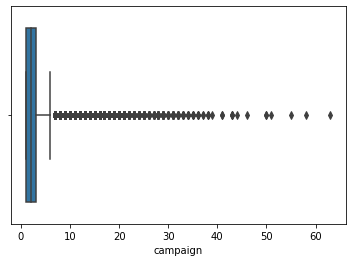

In [33]:
sns.boxplot(df['campaign'])

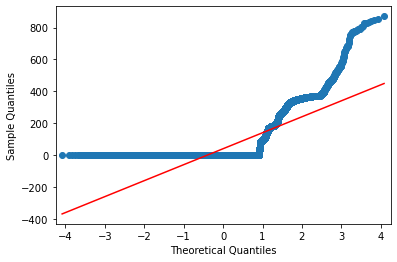

In [31]:
sm.qqplot(df[['pdays']].sort_values(['pdays']), line='s', )
plt.show()

<AxesSubplot:xlabel='pdays', ylabel='Count'>

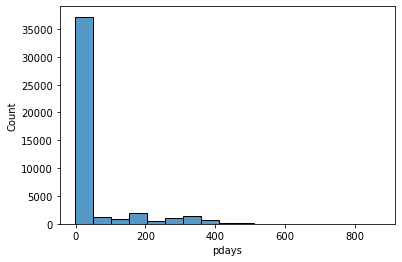

In [40]:
sns.histplot(df['pdays'])

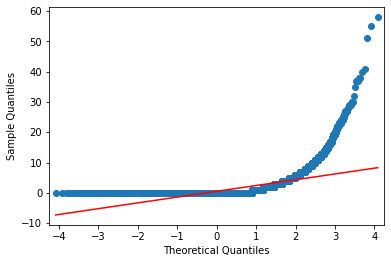

In [32]:
sm.qqplot(df[['previous']].sort_values(['previous']), line='s', )
plt.show()

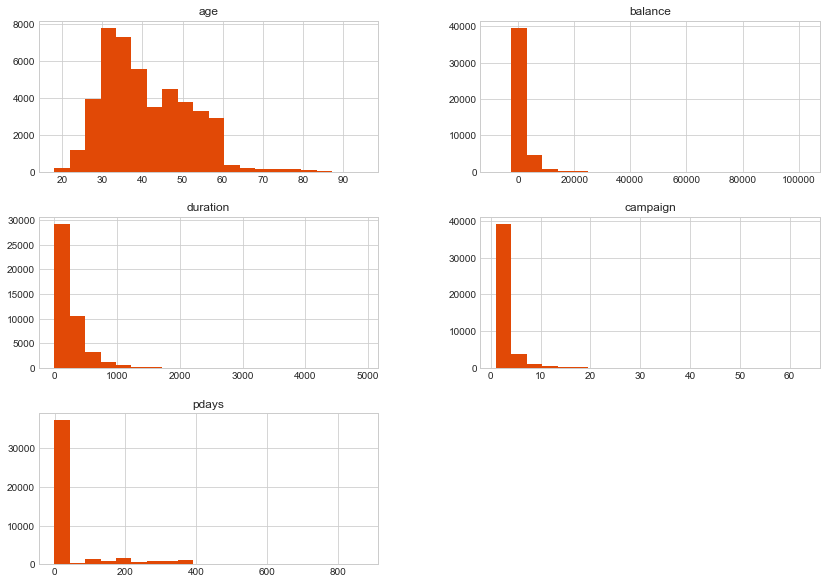

In [43]:
plt.style.use('seaborn-whitegrid')
df[num_vars].hist(bins=20, figsize=(14,10), color='#E14906')
plt.show()

In [22]:
df[(df['default'] == 'yes') & (df['deposit'] == 'yes')]

,date,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,deposit,balance_status
1767,2008-05-09,32,blue-collar,married,secondary,yes,-1,yes,no,unknown,653,1,-1,0,unknown,yes,very low
2387,2008-05-13,24,services,single,secondary,yes,-122,yes,no,unknown,1000,1,-1,0,unknown,yes,very low
4897,2008-05-21,30,blue-collar,single,secondary,yes,239,yes,no,unknown,412,1,-1,0,unknown,yes,low
7637,2008-05-30,48,technician,married,secondary,yes,0,no,no,unknown,682,1,-1,0,unknown,yes,very low
8218,2008-06-02,42,technician,single,secondary,yes,-1129,yes,no,unknown,555,5,-1,0,unknown,yes,very low
8345,2008-06-02,44,management,divorced,tertiary,yes,-411,yes,no,unknown,432,4,-1,0,unknown,yes,very low
8442,2008-06-03,40,self-employed,married,secondary,yes,-754,yes,yes,unknown,941,3,-1,0,unknown,yes,very low
8570,2008-06-03,26,blue-collar,single,secondary,yes,-36,yes,no,unknown,482,2,-1,0,unknown,yes,very low
8817,2008-06-04,27,management,single,tertiary,yes,-713,yes,no,unknown,525,2,-1,0,unknown,yes,very low
9144,2008-06-05,56,housemaid,divorced,primary,yes,1238,no,no,unknown,1558,1,-1,0,unknown,yes,high


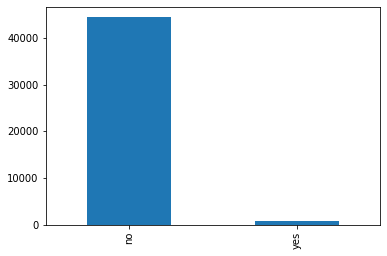

In [23]:
df['default'].value_counts().plot(kind='bar')
plt.show()

In [24]:
# Create pivot table
table = df.pivot_table(index='default', columns='deposit', aggfunc='size').reset_index()

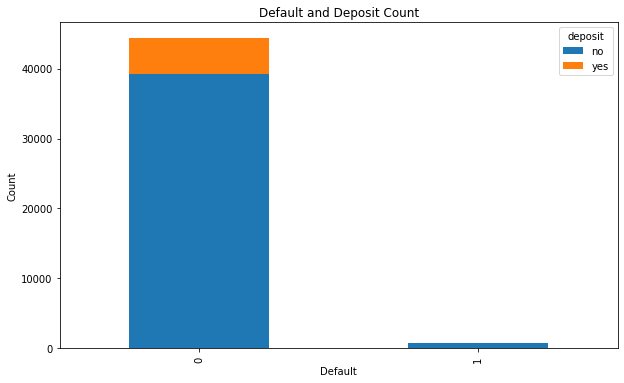

In [25]:
# Plot stacked bar plot
table.plot(kind='bar', stacked=True, figsize=(10,6))
plt.xlabel('Default')
plt.ylabel('Count')
plt.title('Default and Deposit Count')
plt.show()